<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada 2022</h1>
<h2>Problemes 6 - Minimum Spanning Tree</h2>
</center>
</div>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import networkx as nx
from matplotlib import pyplot as plt
import math

<div class="alert alert-success">
    <h1>Problema 1: Union Find</h1>
    <p>
       Implementarem l'algorisme Union-Find. <br>
        Implementeu les tres funcions següents seguint les indicacions de la capçalera.
    </p>    
    
</div>

In [3]:
from collections import defaultdict

def union(parent, rank, node1, node2):
    # Comprovem si el rang de node1 es menor o igual al del segon node.
    # En cas que sigui així, afegim el node2 com a node pare del node1
    if rank[node1] <= rank[node2]:
        parent[node1] = node2
        # Si els rangs fóssin iguals, incrementem en un el rang del node que ha esdevingut pare
        if rank[node1]==rank[node2]:
            rank[node2]+=1
    # En cas que el rang del node1 sigui major que el del node2, node1 esdevé pare
    else:
        parent[node2] = node1   
        
def find(parent, node):
    # Anem obtenint el pare del node d'entrada fins que aquest no en tingui cap
    # Això passarà quan el node pare sigui ell mateix.
    while parent[node] != node:
        node = parent[node]
   
    return node
 
def union_find(lst):
    
    # Agafem tots els nodes únics
    list1, list2 = zip(*lst)
    unique_nodes = set(list1+list2)    
    # Inicialitzem les dues variables rank i parent que ens serviran per anar construïnt el graf
    rank = defaultdict(int)
    parent = {n: n for n in unique_nodes}    
    # Aquesta variable no forma part de l'algorisme. Guardarem totes les modificacions del diccionari 'parent' que anem fent i, d'aquesta
    # forma, podrem veure com anem connectant tots els nodes.
    parent_states = []   
    # Recorrem totes les parelles
    for node1, node2 in lst:      
        # Busquem el node arrel de cada un dels nodes
        parent1 = find(parent, node1)
        parent2 = find(parent, node2)      
        # Si no tenen el mateix pare
        if parent1 != parent2:   
            # Els unim
            union(parent, rank, parent1, parent2) 
        # Guardem totes les versions del diccionari parent per poder-les mostrar
        parent_states.append(parent.copy())     
    return parent, parent_states

Observeu que usant aquest algorisme, els grafs que creem són sempre arbres, és a dir, que no tenen cicles.

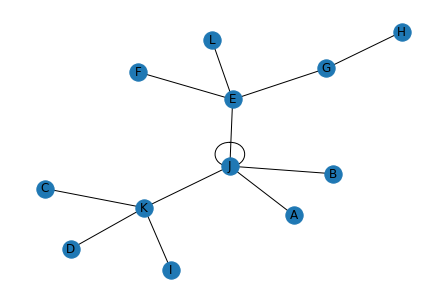

In [4]:
lst = [("C","K"),("F","E"),("A","J"),("A","B"),("C","D"),("D","I"),("L","F"),("C","A"),("A","B"),("H","G"),("H","F"),("H","B")]
struc, struc_states = union_find(lst)

G = nx.Graph(struc)
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=pos, with_labels=True)

Podem veure la construcció d'aquest arbre utilitzant la variable on hem anat guardant totes les versions.

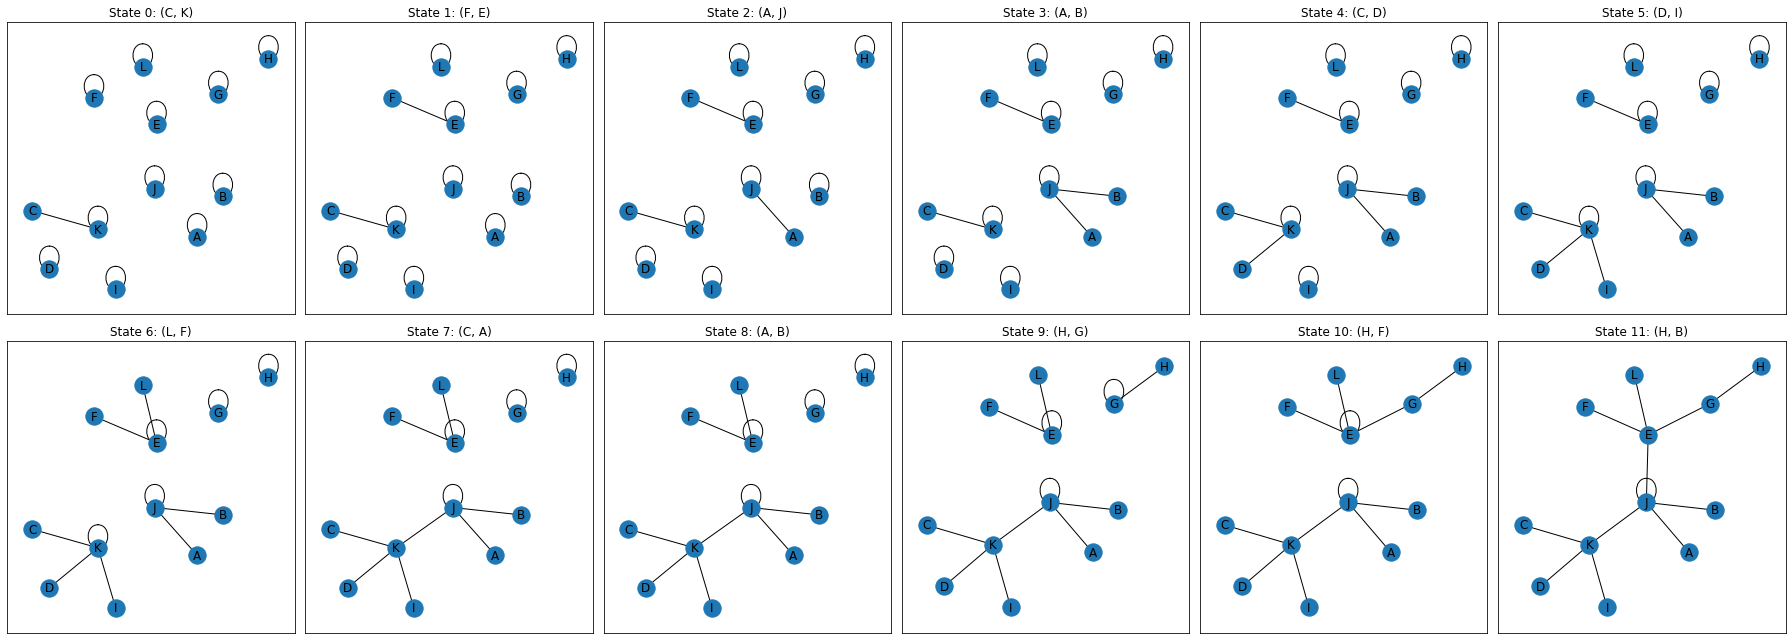

In [5]:
fig, axs = plt.subplots(math.ceil(len(struc_states)/6), 6, figsize=(25,math.ceil(len(struc_states)/6)*4.5))
axs = axs.flatten()
for i, state in enumerate(struc_states):
    G_state = nx.Graph(state)
    
    # Agafem la posició del grap final per a que tots els plots siguin iguals
    nx.draw_networkx(G_state, pos=pos, ax=axs[i], with_labels=True)
    
    n1, n2 = lst[i]
    axs[i].set_title(f'State {i}: ({n1}, {n2})')

for i in range(len(struc_states), len(axs)): 
    axs[i].axis('off')

plt.tight_layout()
plt.show()

<div class="alert alert-success">
    <h1>Problema 2: Detecció de cicles</h1>
    <p>
        Utilitzeu les fucnions <b>union</b> i <b>find</b> implementades en l'exercici anterior per a comprovar si un graf conté cicles. 
    </p>    
    
</div>

In [6]:
def detect_cycles(lst):
    """
    Detecta si un graf conté cicles
    
    Params
    ======
    :lst: Llista d'arestes del graf
    """
    
    # Agafem tots els nodes únics
    list1, list2 = zip(*lst)
    unique_nodes = set(list1+list2)
    
    # Inicialitzem les dues variables rank i parent que ens serviran per anar construïnt el graf
    rank = defaultdict(int)
    parent = {n: n for n in unique_nodes}
    
    # Recorrem totes les parelles
    for node1, node2 in lst:
        
        # Busquem el node arrel de cada un dels nodes
        parent1 = find(parent, node1)
        parent2 = find(parent, node2)
        
        # OBSERVACIÓ: L'única cosa que hem de canviar respecte l'algorisme union-find del primer problema és aquesta condició.
        if parent1 == parent2:
            return True
        
        # Els unim
        union(parent, rank, parent1, parent2)        
    
    return False

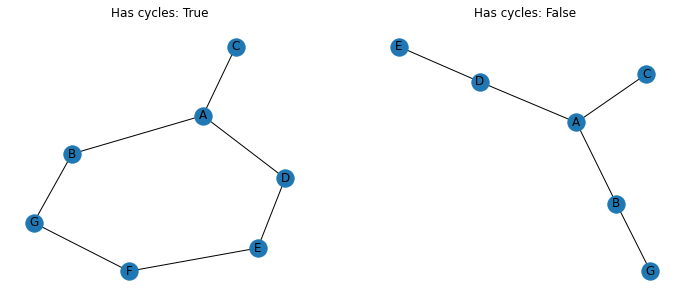

In [7]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

lst = [('A','B'), ('A','C'), ('A','D'), ('D','E'), ('E','F'), ('F','G'), ('G','B')]
G = nx.Graph(lst)
has_cycles = detect_cycles(lst)
nx.draw(G, with_labels=True, ax=axs[0])
axs[0].set_title(f"Has cycles: {has_cycles}")

lst = [('A','B'), ('A','C'), ('A','D'), ('D','E'), ('G','B')]
G = nx.Graph(lst)
has_cycles = detect_cycles(lst)
nx.draw(G, with_labels=True, ax=axs[1])
axs[1].set_title(f"Has cycles: {has_cycles}")

plt.show()

<div class="alert alert-success">
    <h1>Problema 3: Kruskal</h1>
    <p>
       Implementeu l'algorisme Kruskal, basat en l'agorisme Union-Find.
    </p>    
    
</div>

In [8]:
def kruskal(lst):
    # El primer pas és ordenar tots els nodes en funció del seu pes, de menor a major
    lst = sorted(lst, key=lambda x: x[2])  
    # Agafem tots els nodes únics. Ara la llista té tres components ja que inclou el pes
    list1, list2, _ = zip(*lst)
    unique_nodes = set(list1+list2) 
    # Inicialitzem les dues variables rank i parent que ens serviran per anar construïnt el graf
    rank = defaultdict(int)
    parent = {n: n for n in unique_nodes} 
    # Aquí guardem les arestes que formen part del MST
    tree = []
    # Aquí guardarem totes les versions de la variable 'tree' per mostrar la construcció del MST
    tree_states = [] 
    # Recorrem totes les parelles del graf. 
    # ...És necessari? Podeu pensar una solució millor
    for node1, node2, weight in lst:     
        # Busquem el node arrel de cada un dels nodes
        parent1 = find(parent, node1)
        parent2 = find(parent, node2)   
        # Si no tenen el mateix pare, afegim l'aresta i unim
        if parent1 != parent2:     
            # OBSERVACIÓ: Aquesta aresta forma part del MST
            tree.append((node1, node2, weight))
            union(parent, rank, parent1, parent2) 
        # Guardem totes les versions del diccionari parent per poder-les mostrar
        tree_states.append(tree.copy())    
    return tree, tree_states

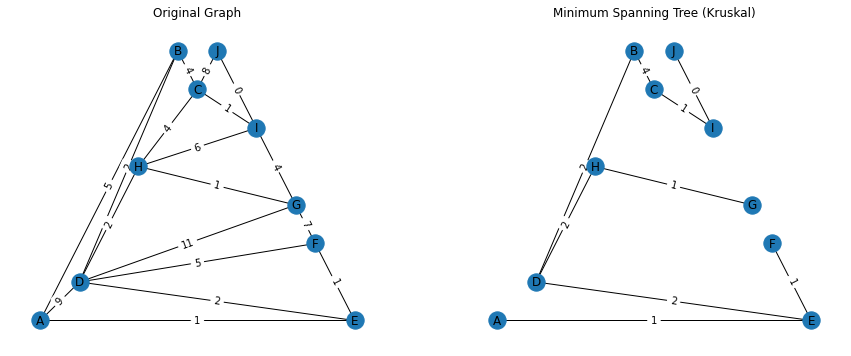

In [9]:
lst = [('A','B',5), ('A','D',9), ('A','E',1), ('B','C',4),('B','D',2),('C','J',8),('C','I',1),('C','H',4),('D','E',2),('D','F',5),('D','G',11),('D','H',2),('E','F',1),('F','G',7),('G','H',1),('G','I',4),
      ('H','I',6), ('I','J',0)]

fig, axs = plt.subplots(1,2, figsize=(15,6))

# Creem un graf i el mostrem a partir de la llista d'arestes i pesos anterior
G = nx.Graph()
G.add_weighted_edges_from(lst)
pos = nx.planar_layout(G)
nx.draw(G, pos=pos, with_labels=True, ax=axs[0])
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, ax=axs[0])
axs[0].set_title('Original Graph')

# Executem l'algorisme sobre aquesta llista
struc, struc_states = kruskal(lst)

# Mostrem el MST
G = nx.Graph()
G.add_weighted_edges_from(struc)
nx.draw(G, pos=pos, with_labels=True, ax=axs[1])
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, ax=axs[1])
axs[1].set_title('Minimum Spanning Tree (Kruskal)')

plt.show()

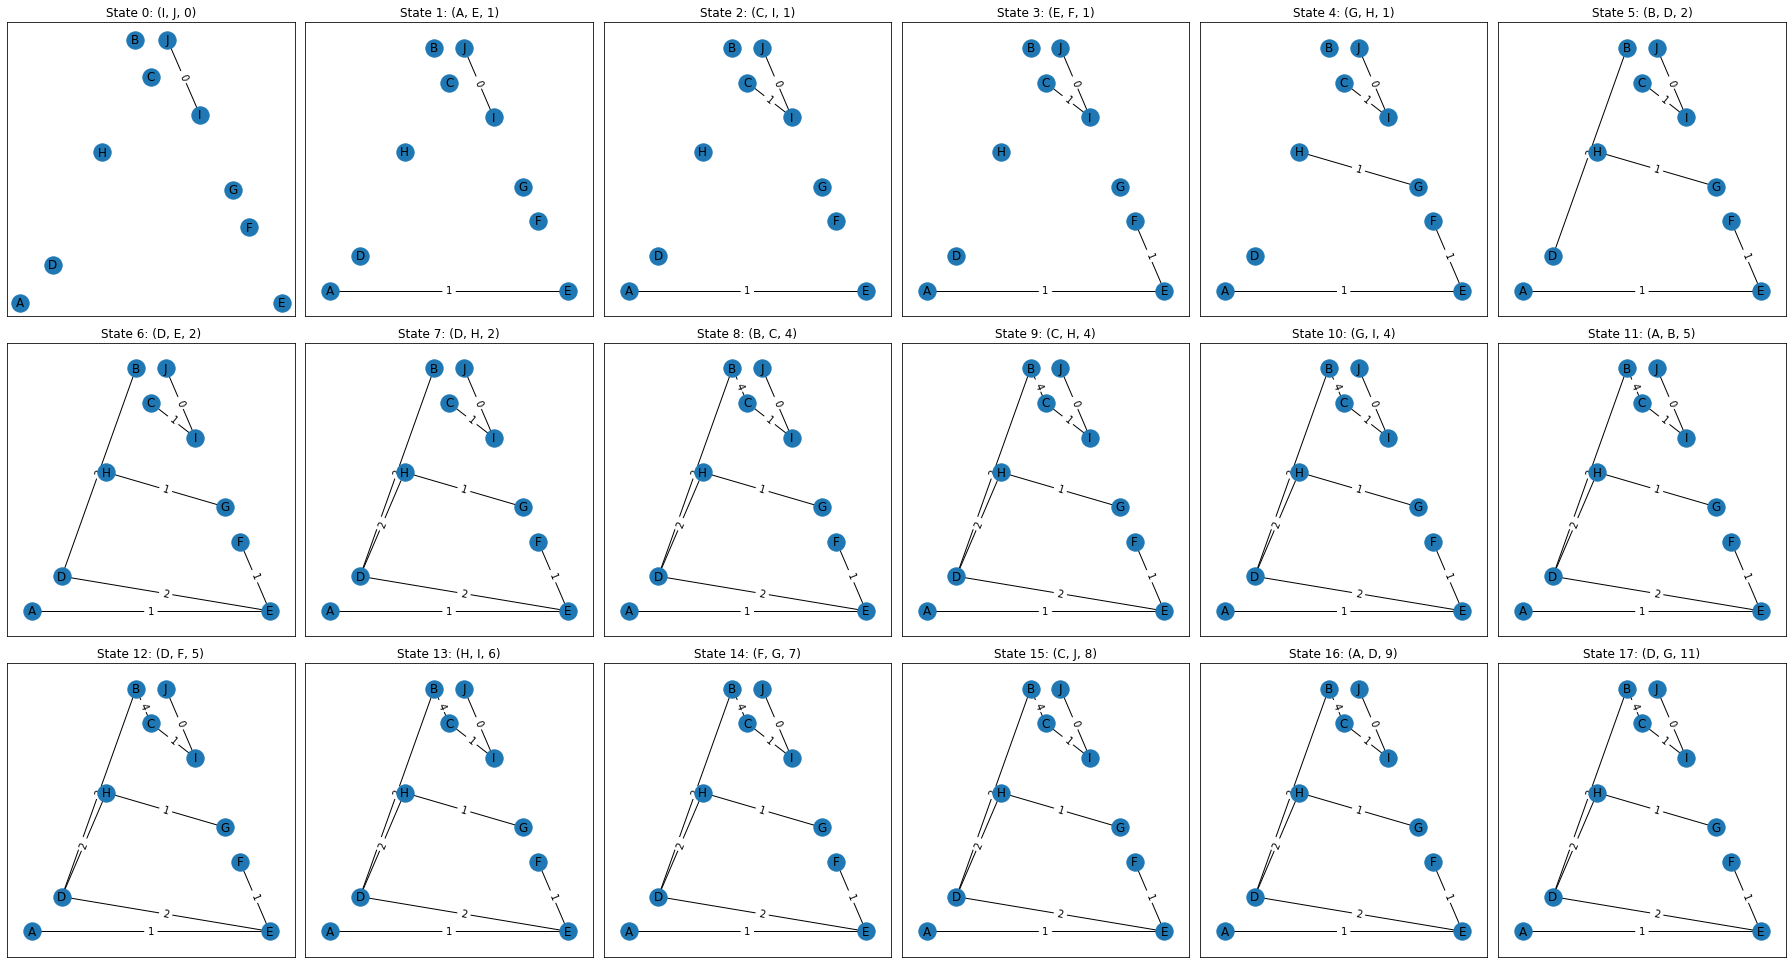

In [10]:
fig, axs = plt.subplots(math.ceil(len(struc_states)/6), 6, figsize=(25,math.ceil(len(struc_states)/6)*4.5))
axs = axs.flatten()

lst = sorted(lst, key=lambda x: x[2])
for i, state in enumerate(struc_states):
    G_state = nx.Graph()
    G_state.add_nodes_from(G.nodes())
    G_state.add_weighted_edges_from(state)
    
    # Agafem la posició del grap final per a que tots els plots siguin iguals
    nx.draw_networkx(G_state, pos=pos, ax=axs[i], with_labels=True)
    labels = nx.get_edge_attributes(G_state,'weight')
    nx.draw_networkx_edge_labels(G_state,pos,edge_labels=labels, ax=axs[i])

    n1, n2, w = lst[i]
    axs[i].set_title(f'State {i}: ({n1}, {n2}, {w})')

for i in range(len(struc_states), len(axs)): 
    axs[i].axis('off')
plt.tight_layout()
plt.show()